## Create an aggregate out of monomers of different habits/PSDs

The gen_polydisperse_monomer generator helps in the construction of aggregates out of multiple distributions of monomers. This allows to generate aggregates with different monomer types. Each monomer type can have its own PSD.

In [1]:
%matplotlib notebook
from __future__ import print_function
import copy
from aggregation import riming_runs
from aggregation.riming import gen_polydisperse_monomer
from matplotlib import pyplot as plt

First I define a dictionary of arguments for a generator of Dendrites. Than I copy that dictionary and I only change the particle habit to Needle.

In [2]:
# I define the properties of the dendrites
dendrites = {'psd':'exponential',
             'size':650e-6,
             'min_size':100.0e-6,
             'max_size':3000.0e-6,
             'mono_type':'dendrite',
             'grid_res':10.0e-6, 
             'rimed':True,
             'debug':False}

# I make a copy of dendrites and turn them to needles (keeping all the parameters unchanged)
needles = copy.copy(dendrites)
needles['mono_type'] = 'needle'

Now I construct a genrator out of this two PSDs of monomers. I balance the ratios of Dendrites and Needle making the first beeing 70% of the overall population and the latter the remaining 30%. Than let 10 monomers out of these two PSDs to aggregate and I also add some rime to show the full potential of the method. Lastly I draw a projection of the rimed aggregate

<IPython.core.display.Javascript object>


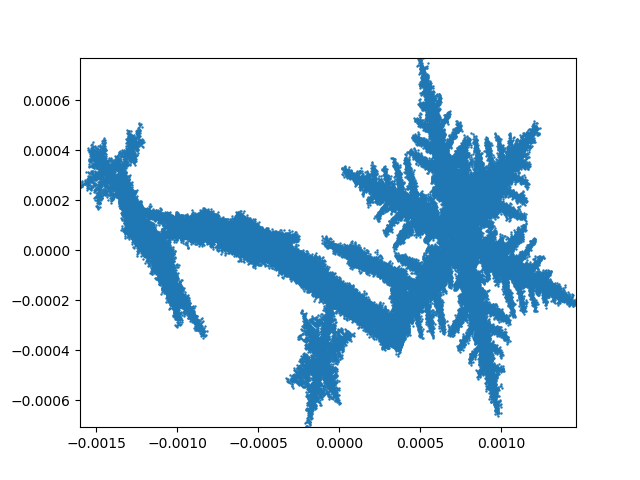

In [3]:
# Create a new polydisperse generator of dendrites and needles in unequal ratios
polygen = gen_polydisperse_monomer(monomers=[dendrites, needles], ratios=[0.7, 0.3])

# Use my polygen as a generator of monomers
agg = riming_runs.generate_rimed_aggregate(polygen,
                                           N=10,
                                           align=True,
                                           riming_lwp=0.01,
                                           riming_mode="simultaneous")

plt.scatter(agg.X[:, 0], agg.X[:, 2], lw=(0,), s=3)
# set plot limits
plt.gca().set_xlim((agg.X[:, 0].min(), agg.X[:, 0].max()))
plt.gca().set_ylim((agg.X[:, 2].min(), agg.X[:, 2].max()))
plt.show()